Let's proceed with an example of polynomial regression with multiple features using the two most predictive variables for price. This example will demonstrate how to use a polynomial transformation that includes both individual polynomial terms and interaction terms between the features.

Let’s assume horsepower and engine_size are the two features with the strongest correlation to price.

Example: Polynomial Regression with Multiple Features
This approach will generate polynomial terms for both horsepower and engine_size up to the second degree, including terms like horsepower², engine_size², and the interaction term horsepower * engine_size.

In [14]:
# Use a relative path to go up one level and then access the Data folder
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
## Import Data: 
car_data = pd.read_csv(r'../Data/CarPrices.csv')

# Display the first few rows to confirm it loaded correctly
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Selecting the top two predictor variables

Selecting the top predictors is usually done by evaluating how strongly each feature correlates with the target variable (in this case, price). Here are a few common methods to identify the best predictors:

1. Correlation Analysis
Calculate the correlation coefficient between each feature and the target variable. Features with higher absolute correlation values are generally better predictors.
This can be done using Pearson’s correlation for linear relationships.
    
    
   2.Feature Importance from Tree-Based Models
Tree-based models like Random Forest or Gradient Boosting can measure feature importance, indicating how much each feature contributes to predicting price.
This method can handle non-linear relationships and interactions naturally

<Figure size 1200x600 with 0 Axes>

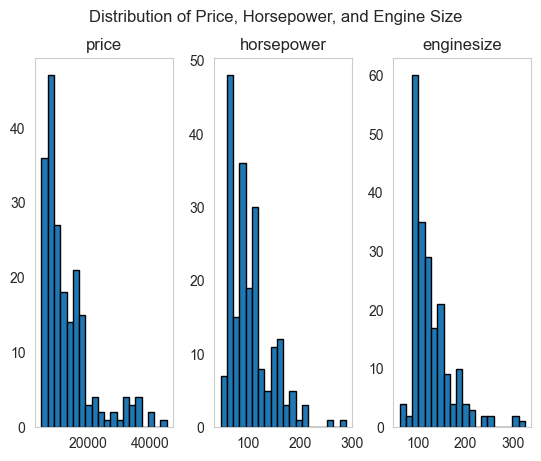

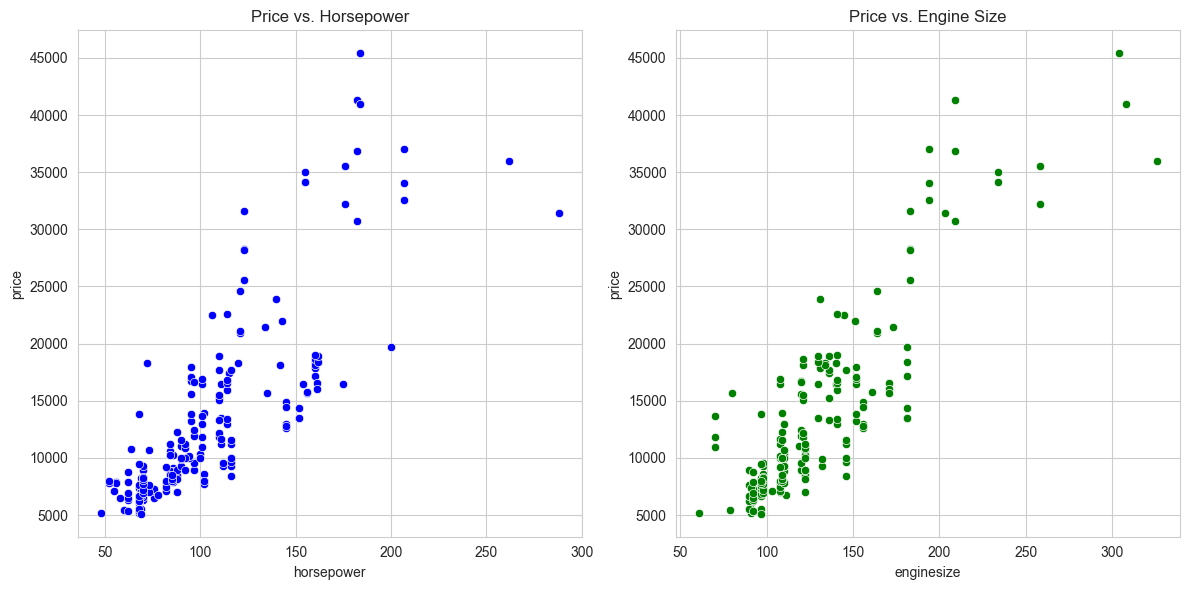

In [7]:
# As we dont need the make and model columns, we will drop them:

# Step: Filter only numerical variables
car_data = car_data.select_dtypes(include=['float64', 'int64'])


# Step 2.1: Histograms of key numerical variables
plt.figure(figsize=(12, 6))
car_data[['price', 'horsepower', 'enginesize']].hist(bins=20, edgecolor='black', grid=False, layout=(1, 3))
plt.suptitle('Distribution of Price, Horsepower, and Engine Size')
plt.show()

# Step 2.2: Scatter plots to observe relationships with Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='horsepower', y='price', data=car_data, color='blue')
plt.title('Price vs. Horsepower')

plt.subplot(1, 2, 2)
sns.scatterplot(x='enginesize', y='price', data=car_data, color='green')
plt.title('Price vs. Engine Size')

plt.tight_layout()
plt.show()



In [8]:
# Select the top two predictor variables
X = car_data[['horsepower', 'enginesize']]
y = car_data['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Print the coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [  0.         166.70232185  71.30079662   0.76331341  -2.1220829
   1.0562321 ]
Model intercept: -10588.38732575591


### Creating the model
Explanation of Each Step
Polynomial Transformation: PolynomialFeatures(degree=2) creates terms like horsepower², engine_size², and horsepower * engine_size, enabling the model to capture non-linear relationships and interactions.
Model Training: The transformed training data (X_train_poly) is used to fit a linear regression model that effectively learns a polynomial function of horsepower and engine_size.
Evaluation: We calculate MSE and 
R
2
R 
2
  to assess model accuracy, giving us an idea of how well the model generalizes to the test set.

In [10]:
### We Crea and evaluate the model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define predictors (top two features) and target variable
X = car_data[['horsepower', 'enginesize']]
y = car_data['price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Initialize and train the regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Model Coefficients: [  0.         166.70232185  71.30079662   0.76331341  -2.1220829
   1.0562321 ]
Model Intercept: -10588.38732575591
Mean Squared Error (MSE): 16376848.506682131
R-squared (R²): 0.7925511226284381


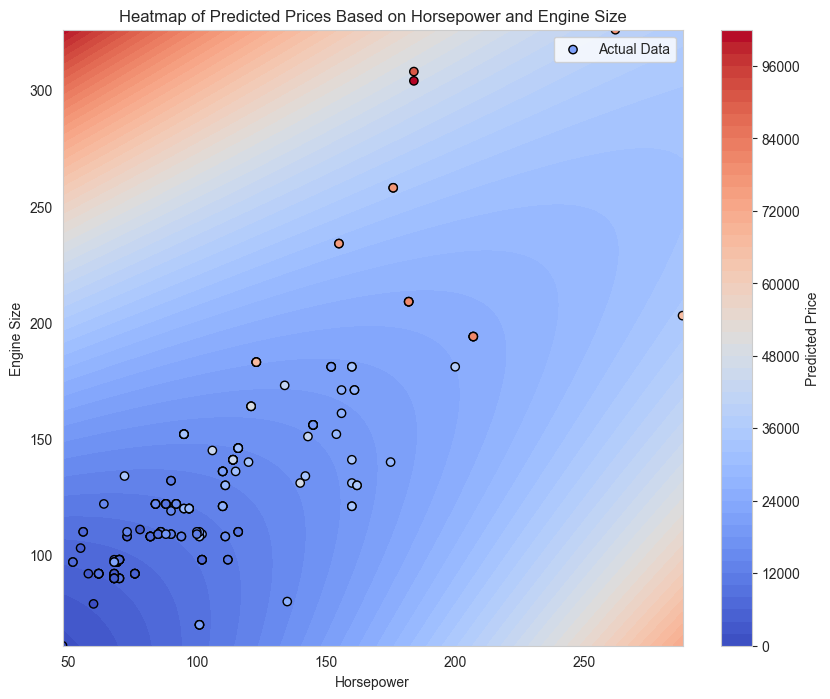

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of horsepower and engine_size values
horsepower_range = np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100)
engine_size_range = np.linspace(X['enginesize'].min(), X['enginesize'].max(), 100)
horsepower_grid, engine_size_grid = np.meshgrid(horsepower_range, engine_size_range)

# Flatten the grid arrays and combine them for polynomial transformation
grid_points = np.c_[horsepower_grid.ravel(), engine_size_grid.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predict price using the model on the grid points
price_predictions = model.predict(grid_points_poly).reshape(horsepower_grid.shape)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.contourf(horsepower_grid, engine_size_grid, price_predictions, cmap="coolwarm", levels=50)
plt.colorbar(heatmap, label='Predicted Price')
plt.scatter(X['horsepower'], X['enginesize'], c=y, cmap="coolwarm", edgecolor='black', label='Actual Data')
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.title('Heatmap of Predicted Prices Based on Horsepower and Engine Size')
plt.legend(['Actual Data'])
plt.show()


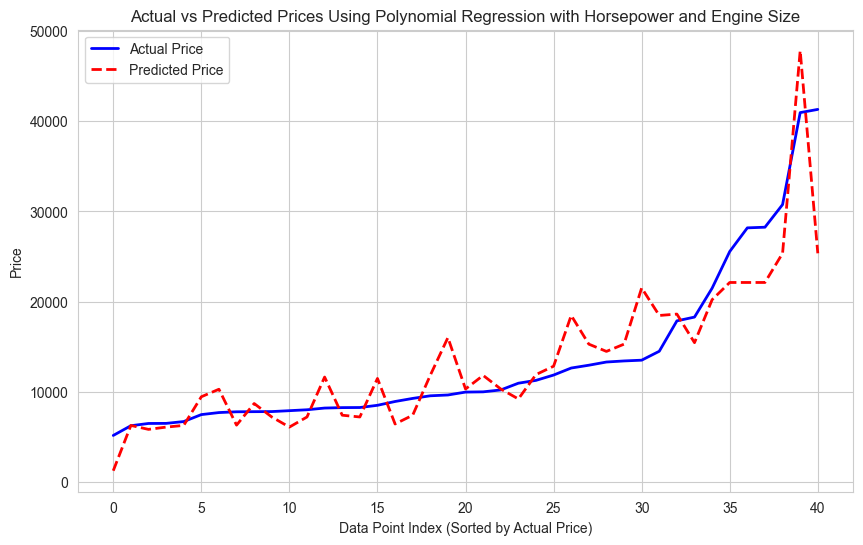

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Sort values by actual price to make the plot more interpretable
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Price', color='blue', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted Price', color='red', linestyle='--', linewidth=2)
plt.xlabel('Data Point Index (Sorted by Actual Price)')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices Using Polynomial Regression with Horsepower and Engine Size')
plt.legend()
plt.show()


Explanation of the Plot
Actual Price Line (Blue): This line shows the actual price values from the test set, sorted in ascending order to make the trend clearer.
Predicted Price Line (Red Dashed): This line represents the predicted price values from the polynomial model using both horsepower and engine_size.
Interpretation: If the red line closely follows the blue line, the model is performing well. Deviations between the two lines indicate where the model’s predictions differ from the actual values.

## Statsmodels
We coud use the statsmodels library to compare the results with the previous model while usning the feature 'enginesize' and 'curbweight' as predictors

In [22]:
#We continue with the model evaluation, now we will use the statsmodels library to compare the results with the previous model
# while usning the feature 'enginesize' and 'curbweight' as predictors
import pandas as pd
import statsmodels.api as sm

## Import Data: 

df=pd.read_csv(r'../Data/CarPrices.csv')


# Convertimos las columnas necesarias en formato numérico
# Eliminar la columna 'CarName' ya que no es relevante para el análisis de precios
df = df.drop(columns=['CarName'])

# Convertir 'cylindernumber' a formato numérico
cylinder_mapping = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

# Convertir variables categóricas restantes a formato numérico mediante codificación one-hot
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 
                                 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], drop_first=True)

# Definimos las variables independientes y dependiente para el análisis
y = df['price']  # Variable dependiente (precio)

# Preparar los datos para ambos modelos usando statsmodels para comparar


# Modelo 1: Solo enginesize
X1 = df[['enginesize']]
X1 = sm.add_constant(X1)  # Agregar término constante para la intersección (bias)
model1 = sm.OLS(y, X1).fit()

# Modelo 2: enginesize y curbweight
X2 = df[['enginesize', 'curbweight']]
X2 = sm.add_constant(X2)  # Agregar término constante para la intersección (bias)
model2 = sm.OLS(y, X2).fit() # Aqui estamos entrenando el modelo    

# Resumen de ambos modelos
model1_summary = model1.summary()
model2_summary = model2.summary()

model1_summary, model2_summary


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.764
 Model:                            OLS   Adj. R-squared:                  0.763
 Method:                 Least Squares   F-statistic:                     657.6
 Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.35e-65
 Time:                        09:49:53   Log-Likelihood:                -1984.4
 No. Observations:                 205   AIC:                             3973.
 Df Residuals:                     203   BIC:                             3979.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------